## SciML in Pytorch half data from LHS

In [36]:
import os

# Ensure the output folder exists
output_folder = 'model_train_images'
os.makedirs(output_folder, exist_ok=True)

import torch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import matplotlib
matplotlib.rcParams['figure.dpi'] = 200  # highres display
plt.rcParams["figure.figsize"] = (20, 3)
plt.rcParams.update({'font.size': 22})

import imageio
my_images = []  # You can keep this list for storing images





In [37]:
import torch
import numpy as np

# Data Generation
ndata = 550
x = np.linspace(-50, 50, ndata)
y = x**2 / 200

n = len(x)  # Number of data points
print(n)

# Slice out a small number of points from the LHS of the domain
x_data = x[0:275:10]
y_data = y[0:275:10]
print(x_data.shape, y_data.shape)

# To check the amount of data in the sliced out portion
lhs_percentage = (x_data.shape[0] / ndata) * 100
print(f"Percentage of LHS Sliced Data: {lhs_percentage:.2f}%")

550
(28,) (28,)
Percentage of LHS Sliced Data: 5.09%


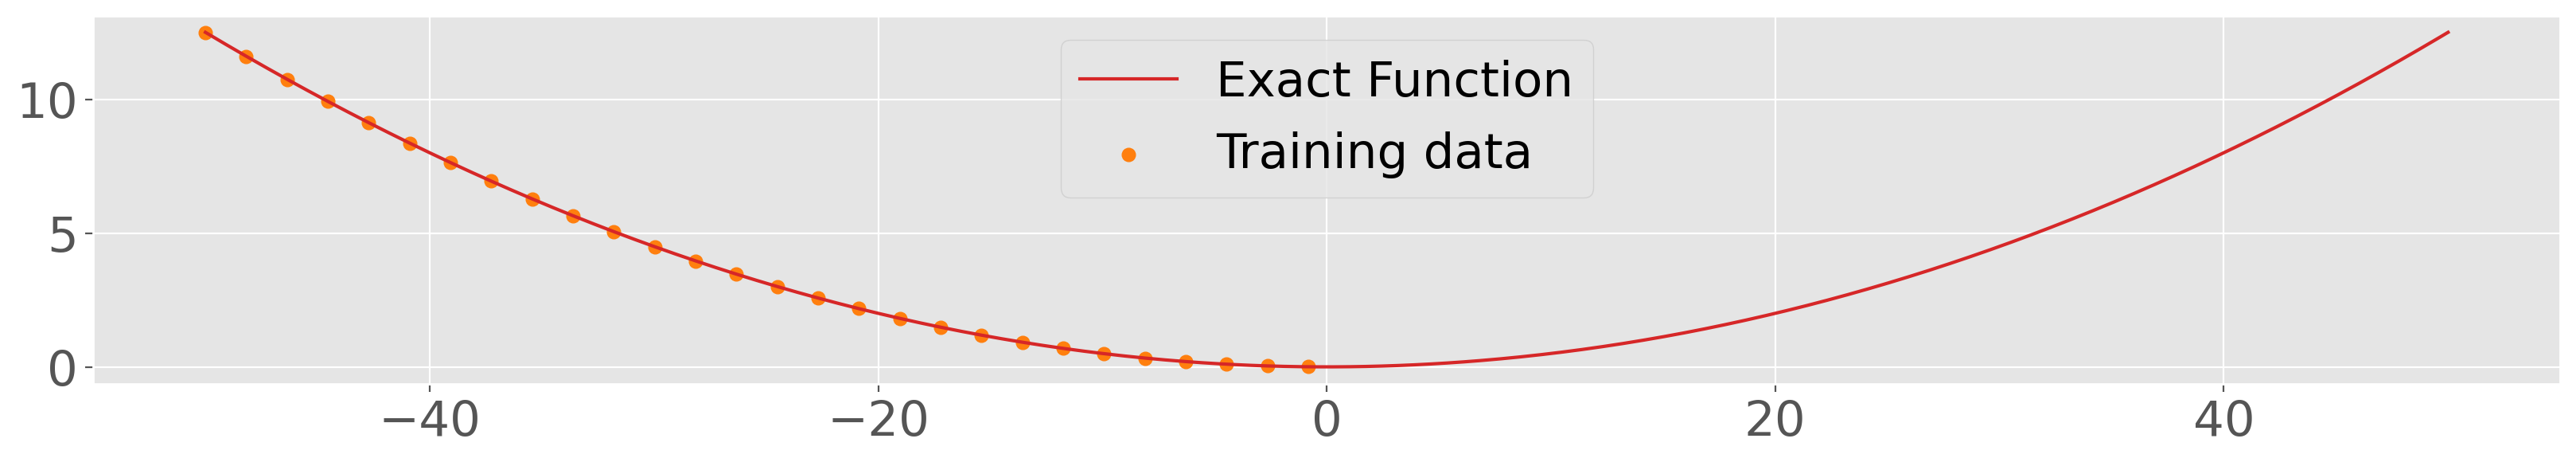

In [38]:
# Plotting
plt.figure()
plt.plot(x, x**2/200, color="tab:red", label="Exact Function")
plt.scatter(x_data, y_data, color="tab:orange", label="Training data")
plt.legend()
#plt.title("Untrained data")
plt.show()

In [39]:
import torch
import matplotlib.pyplot as plt
import numpy as np

class PerformancePlotCallback(torch.nn.Module):
    def __init__(self, x_test, y_test, x, count, model_name):
        super(PerformancePlotCallback, self).__init__()
        self.x_test = x_test
        self.y_test = y_test
        self.count = count
        self.model_name = model_name
        self.x = x
        
  
                
                
    def forward(self, epoch, logs={}):
        if epoch % 10 == 0:
            self.count += 1

        with torch.no_grad():
            y_pred = self.model(self.x_test) 
                
                                       
            fig, ax = plt.subplots(figsize=(8, 4))
            plt.scatter(self.x_test, y_pred, alpha=0.6, color='#FF0000', lw=1, ec='black')
            plt.scatter(self.x_test, self.y_test, alpha=0.1, color='blue', lw=1, ec='black')

            lims = [-50, 50]

            plt.plot(self.x, self.x**2/200, lw=1, color='#0000FF')
            plt.ticklabel_format(useOffset=False, style='plain')
            plt.xticks(fontsize=18)
            plt.yticks(fontsize=18)
            plt.xlim(lims)
            plt.ylim([-5, 20])
            plt.xlabel('x')
            plt.ylabel('$x^2/200$')

            plt.tight_layout()
            plt.title(f'Prediction Visualization - Epoch: {epoch}', fontsize=18)
            plt.savefig('model_train_images/' + self.model_name + "_" + str(self.count))
            plt.close()

            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)

In [40]:
import torch
import matplotlib.pyplot as plt
import numpy as np

class PerformancePlotCallbackn(torch.nn.Module):
    def __init__(self, x_test, y_test, x, count, model_name):
        super(PerformancePlotCallbackn, self).__init__()
        self.x_test = x_test
        self.y_test = y_test
        self.count = count
        self.model_name = model_name
        self.x = x
        
    def forward(self, epoch, logs={}):
        if epoch % 10 == 0:
            self.count += 1
            
            with torch.no_grad():
                y_pred = self(self.x)  # Assuming self is your PyTorch model
                
            fig, ax = plt.subplots(figsize=(8, 4))
            plt.scatter(self.x, y_pred, alpha=0.6, color='#FF0000', lw=1, ec='black')
            plt.scatter(self.x_test, self.y_test, alpha=0.1, color='blue', lw=1, ec='black')

            lims = [-50, 50]

            plt.plot(self.x, self.x**2/200, lw=1, color='#0000FF')
            plt.ticklabel_format(useOffset=False, style='plain')
            plt.xticks(fontsize=18)
            plt.yticks(fontsize=18)
            plt.xlim(lims)
            plt.ylim([-5, 20])
            plt.xlabel('x')
            plt.ylabel('$x^2/200$')

            plt.tight_layout()
            plt.title(f'Prediction Visualization - Epoch: {epoch}', fontsize=18)
            
            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)

In [41]:
# MODEL 1

import torch
import torch.nn as nn
import torch.optim as optim
import imageio
import matplotlib.pyplot as plt
import numpy as np

# Data Generation
ndata = 550
x = torch.linspace(-50, 50, ndata)
y = x**2 / 200

# Sliced data
x_data = x[0:275:10]
y_data = y[0:275:10]




# Model definition
class ModelWithoutActivation(nn.Module):
    def __init__(self):
        super(ModelWithoutActivation, self).__init__()
        self.layer1 = nn.Linear(1, 32)
        self.layer2 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

model1 = ModelWithoutActivation()  # Corrected line
criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr=1e-2)

# Print model summary
print(model1)

# Training loop
my_images = []
for epoch in range(500):
    model1.train()
    optimizer.zero_grad()
    outputs = model1(x_data.unsqueeze(1))  # Assuming x_data is a 1D tensor, unsqueeze to add batch dimension
    loss = criterion(outputs, y_data.unsqueeze(1))
    loss.backward()
    optimizer.step()
    
    # Print epoch number and loss for every epoch
    print(f'Epoch [{epoch+1}/500], Loss: {loss.item():.4f}')
    
    # Performance plot
    if epoch % 10 == 0:
        plt.figure()
        plt.scatter(x, model1(x.unsqueeze(1)).detach().numpy(), alpha=0.6, color='#FF0000', lw=1, ec='black')
        plt.scatter(x_data, y_data, alpha=0.1, color='blue', lw=1, ec='black')
        plt.plot(x, x**2/200, lw=1, color='#0000FF')
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.xlim([-50, 50])
        plt.ylim([-5, 20])
        plt.xlabel('x')
        plt.ylabel('$x^2/200$')
        plt.tight_layout()
        plt.title(f'Prediction Visualization - Epoch: {epoch}', fontsize=18)
        plt.close()
        fig = plt.gcf()
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        my_images.append(image)

# Save images as a GIF
imageio.mimsave('./model_1pytorch.gif', my_images, fps=10)

ModelWithoutActivation(
  (layer1): Linear(in_features=1, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=1, bias=True)
)
Epoch [1/500], Loss: 92.6896
Epoch [2/500], Loss: 22.0019
Epoch [3/500], Loss: 2.6504
Epoch [4/500], Loss: 17.3951
Epoch [5/500], Loss: 32.8007
Epoch [6/500], Loss: 32.5306
Epoch [7/500], Loss: 21.6913
Epoch [8/500], Loss: 9.7461
Epoch [9/500], Loss: 3.1137
Epoch [10/500], Loss: 3.4906
Epoch [11/500], Loss: 8.3545
Epoch [12/500], Loss: 13.2980
Epoch [13/500], Loss: 15.0532
Epoch [14/500], Loss: 13.0310
Epoch [15/500], Loss: 8.8067
Epoch [16/500], Loss: 4.7093
Epoch [17/500], Loss: 2.5436
Epoch [18/500], Loss: 2.8404
Epoch [19/500], Loss: 4.7868
Epoch [20/500], Loss: 6.8443
Epoch [21/500], Loss: 7.7050
Epoch [22/500], Loss: 6.9720
Epoch [23/500], Loss: 5.1921
Epoch [24/500], Loss: 3.3737
Epoch [25/500], Loss: 2.3710
Epoch [26/500], Loss: 2.4665
Epoch [27/500], Loss: 3.3156
Epoch [28/500], Loss: 4.2318
Epoch [29/500], Loss: 4.6182
Epoch [30

<Figure size 4000x600 with 0 Axes>

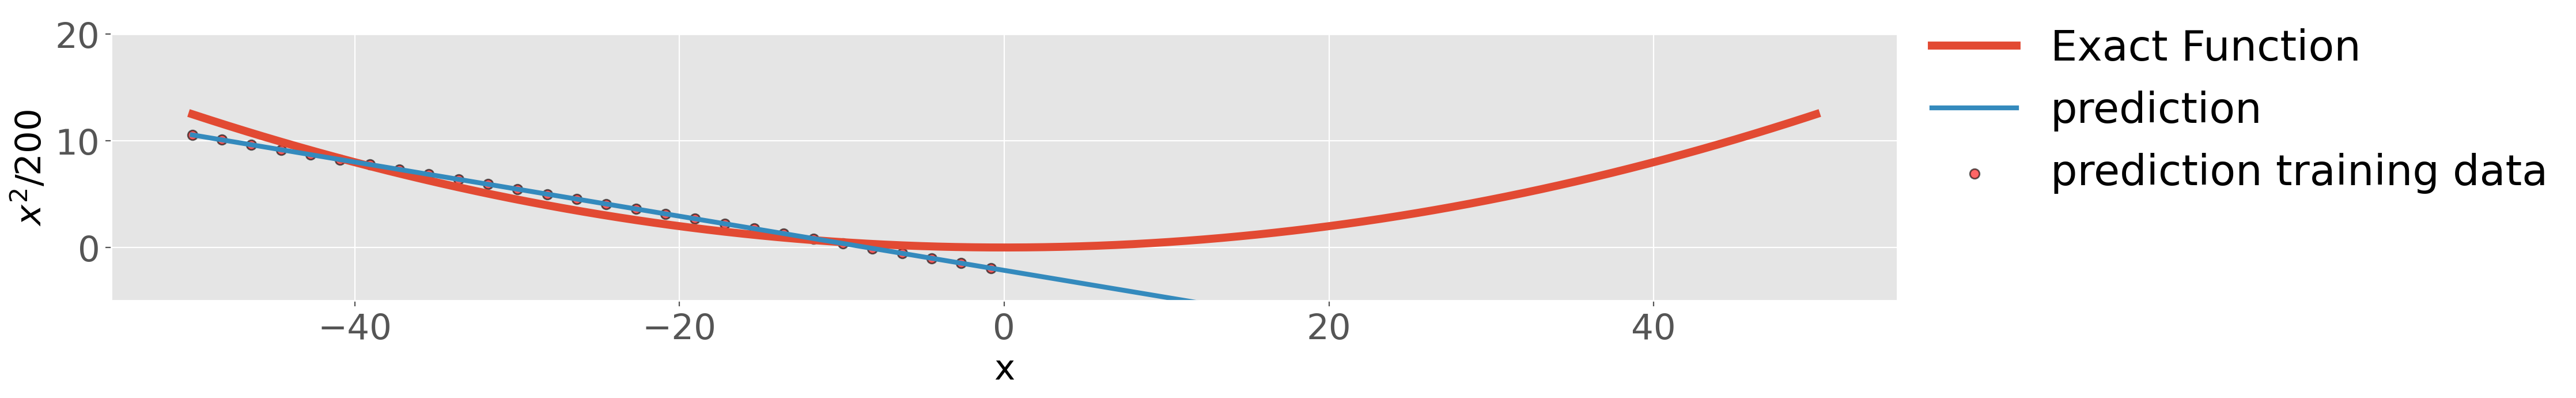

In [42]:
# Plotting
plt.figure()
plt.plot(x, x**2/200, lw=5, label="Exact Function")

plt.plot(x, model1(x.unsqueeze(1)).detach().numpy(), lw=3, label="prediction")

plt.scatter(x_data, model1(x_data.unsqueeze(1)).detach().numpy(), alpha=0.6, color='#FF0000', lw=1, ec='black', label="prediction training data")


plt.ylim([-5, 20])
plt.xlabel('x')
plt.ylabel('$x^2/200$')
l = plt.legend(loc=(1.01, 0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")
#plt.title("Trained data [model 1]")
plt.show()





In [43]:
 # MODEL 2 
    
import torch
import torch.nn as nn
import torch.optim as optim
import imageio
import matplotlib.pyplot as plt
import numpy as np

# Model definition
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.layer1 = nn.Linear(1, 132)
        self.layer2 = nn.Linear(132, 132)
        self.layer3 = nn.Linear(132, 132)
        self.layer4 = nn.Linear(132, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)
        return x

model2 = Model2()
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=1e-2)

# Training loop
my_images = []
for epoch in range(601):
    model2.train()
    optimizer.zero_grad()
    outputs = model2(x_data.unsqueeze(1))  # Assuming x_data is a 1D tensor, unsqueeze to add batch dimension
    loss = criterion(outputs, y_data.unsqueeze(1))
    loss.backward()
    optimizer.step()
    
    # Performance plot
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/600], Loss: {loss.item():.4f}')
        plt.figure()
        plt.scatter(x, model2(x.unsqueeze(1)).detach().numpy(), alpha=0.6, color='#FF0000', lw=1, ec='black')
        plt.scatter(x_data, y_data, alpha=0.1, color='blue', lw=1, ec='black')
        plt.plot(x, x**2/200, lw=1, color='#0000FF')
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.xlim([-50, 50])
        plt.ylim([-5, 20])
        plt.xlabel('x')
        plt.ylabel('$x^2/200$')
        plt.tight_layout()
        plt.title(f'Prediction Visualization - Epoch: {epoch}', fontsize=18)
        plt.close()
        fig = plt.gcf()
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        my_images.append(image)

# Save images as a GIF
imageio.mimsave('./model_2a.gif', my_images, fps=10)

Epoch [1/600], Loss: 39.5341
Epoch [11/600], Loss: 8.6885
Epoch [21/600], Loss: 2.0883
Epoch [31/600], Loss: 1.9247
Epoch [41/600], Loss: 1.7622
Epoch [51/600], Loss: 1.6066
Epoch [61/600], Loss: 1.3993
Epoch [71/600], Loss: 1.0871
Epoch [81/600], Loss: 0.7743
Epoch [91/600], Loss: 0.4463
Epoch [101/600], Loss: 0.2131
Epoch [111/600], Loss: 0.1964
Epoch [121/600], Loss: 0.1125
Epoch [131/600], Loss: 0.0892
Epoch [141/600], Loss: 0.1048
Epoch [151/600], Loss: 0.0542
Epoch [161/600], Loss: 0.0251
Epoch [171/600], Loss: 0.0268
Epoch [181/600], Loss: 0.0421
Epoch [191/600], Loss: 0.0289
Epoch [201/600], Loss: 0.0253
Epoch [211/600], Loss: 0.0134
Epoch [221/600], Loss: 0.0110
Epoch [231/600], Loss: 0.0135
Epoch [241/600], Loss: 0.0368
Epoch [251/600], Loss: 0.1555
Epoch [261/600], Loss: 0.0068
Epoch [271/600], Loss: 0.0351
Epoch [281/600], Loss: 0.0190
Epoch [291/600], Loss: 0.0410
Epoch [301/600], Loss: 0.0117
Epoch [311/600], Loss: 0.0167
Epoch [321/600], Loss: 0.0102
Epoch [331/600], Los

<Figure size 4000x600 with 0 Axes>

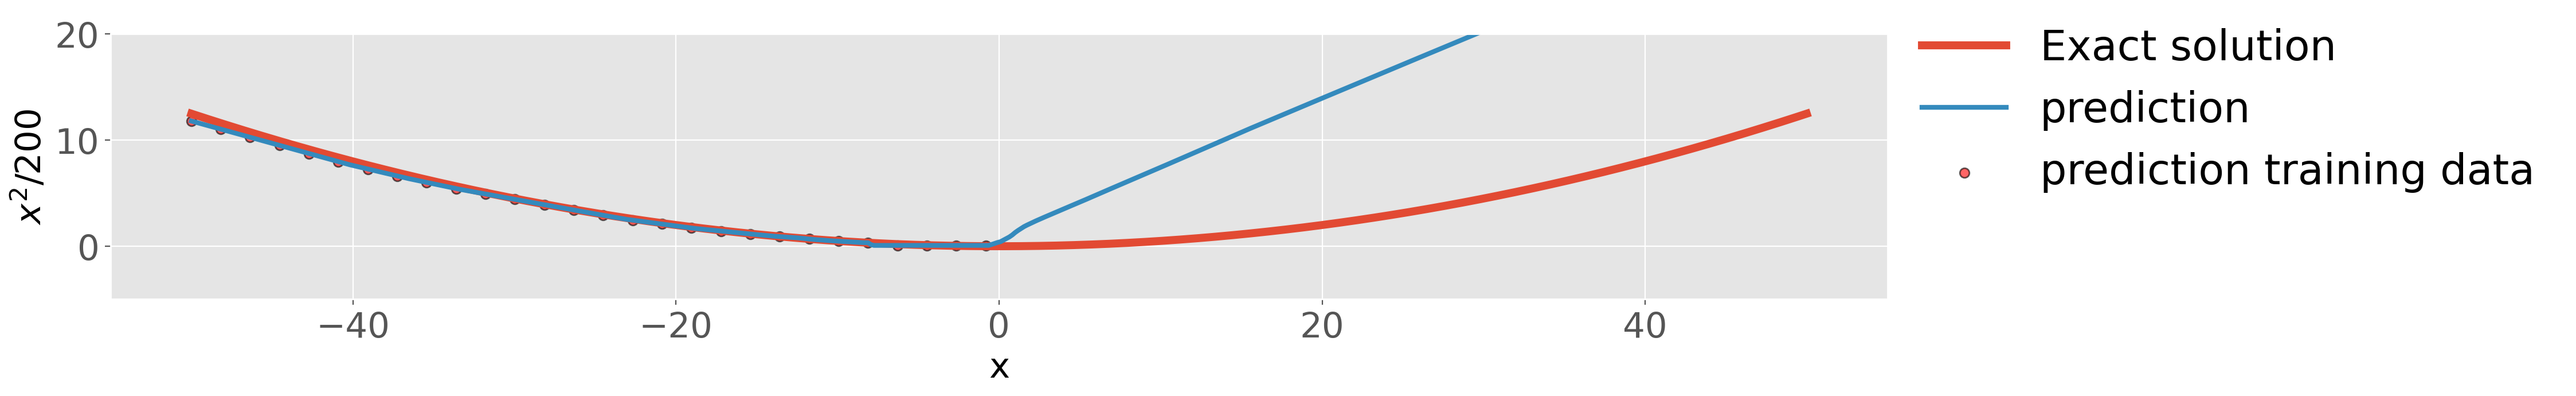

In [48]:
import matplotlib.pyplot as plt

x_data = x[0:275:10]
y_data = y[0:275:10]

plt.figure()
plt.plot(x, x**2/200, lw=5, label="Exact solution")
plt.plot(x, model2(x.unsqueeze(1)).detach().numpy(), lw=3, label="prediction")
plt.scatter(x_data, model2(x_data.unsqueeze(1)).detach().numpy(), alpha=0.6,
            color='#FF0000', lw=1, ec='black', label="prediction training data ")


plt.ylim([-5, 20])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01, 0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")

#plt.title("Trained data [model 2]")

plt.show()

In [49]:
 # Model 2d

import imageio
import numpy as np
import matplotlib.pyplot as plt

# Define the sliced data
x_data = x[0:275:10]
y_data = y[0:275:10]

# Model definition
class Model2d(nn.Module):
    def __init__(self):
        super(Model2d, self).__init__()
        self.layer1 = nn.Linear(1, 132)
        self.layer2 = nn.Linear(132, 132)
        self.layer3 = nn.Linear(132, 132)
        self.layer4 = nn.Linear(132, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)
        return x

model2d = Model2d()
criterion = nn.MSELoss()
optimizer = optim.Adam(model2d.parameters(), lr=1e-2)

# Training loop
my_images = []
for epoch in range(601):  # Include epoch 600
    model2d.train()
    optimizer.zero_grad()
    outputs = model2d(x_data.unsqueeze(1))  # Assuming x_data is a 1D tensor, unsqueeze to add batch dimension
    loss = criterion(outputs, y_data.unsqueeze(1))
    loss.backward()
    optimizer.step()
    
    # Performance plot
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/601], Loss: {loss.item():.4f}')
        plt.figure()
        plt.scatter(x, model2d(x.unsqueeze(1)).detach().numpy(), alpha=0.6, color='#FF0000', lw=1, ec='black')
        plt.scatter(x_data, y_data, alpha=0.1, color='blue', lw=1, ec='black')
        plt.plot(x, x**2/200, lw=1, color='#0000FF')
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.xlim([-50, 50])
        plt.ylim([-5, 20])
        plt.xlabel('x')
        plt.ylabel('$x^2/200$')
        plt.tight_layout()
        plt.title(f'Prediction Visualization - Epoch: {epoch}', fontsize=18)
        plt.close()
        fig = plt.gcf()
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        my_images.append(image)

# Save images as a GIF
imageio.mimsave('./model_2bpytorch.gif', my_images, fps=10)

Epoch [1/601], Loss: 26.0467
Epoch [11/601], Loss: 3.0470
Epoch [21/601], Loss: 2.1679
Epoch [31/601], Loss: 1.9922
Epoch [41/601], Loss: 1.5374
Epoch [51/601], Loss: 0.7572
Epoch [61/601], Loss: 0.2515
Epoch [71/601], Loss: 0.5196
Epoch [81/601], Loss: 0.1666
Epoch [91/601], Loss: 0.0617
Epoch [101/601], Loss: 0.0608
Epoch [111/601], Loss: 0.0227
Epoch [121/601], Loss: 0.4648
Epoch [131/601], Loss: 0.3593
Epoch [141/601], Loss: 0.0738
Epoch [151/601], Loss: 0.0842
Epoch [161/601], Loss: 0.0395
Epoch [171/601], Loss: 0.0287
Epoch [181/601], Loss: 0.0150
Epoch [191/601], Loss: 0.0129
Epoch [201/601], Loss: 0.0095
Epoch [211/601], Loss: 0.1198
Epoch [221/601], Loss: 0.2266
Epoch [231/601], Loss: 0.0479
Epoch [241/601], Loss: 0.0454
Epoch [251/601], Loss: 0.0210
Epoch [261/601], Loss: 0.0181
Epoch [271/601], Loss: 0.0091
Epoch [281/601], Loss: 0.1869
Epoch [291/601], Loss: 0.0761
Epoch [301/601], Loss: 0.0390
Epoch [311/601], Loss: 0.0242
Epoch [321/601], Loss: 0.0089
Epoch [331/601], Los

<Figure size 4000x600 with 0 Axes>

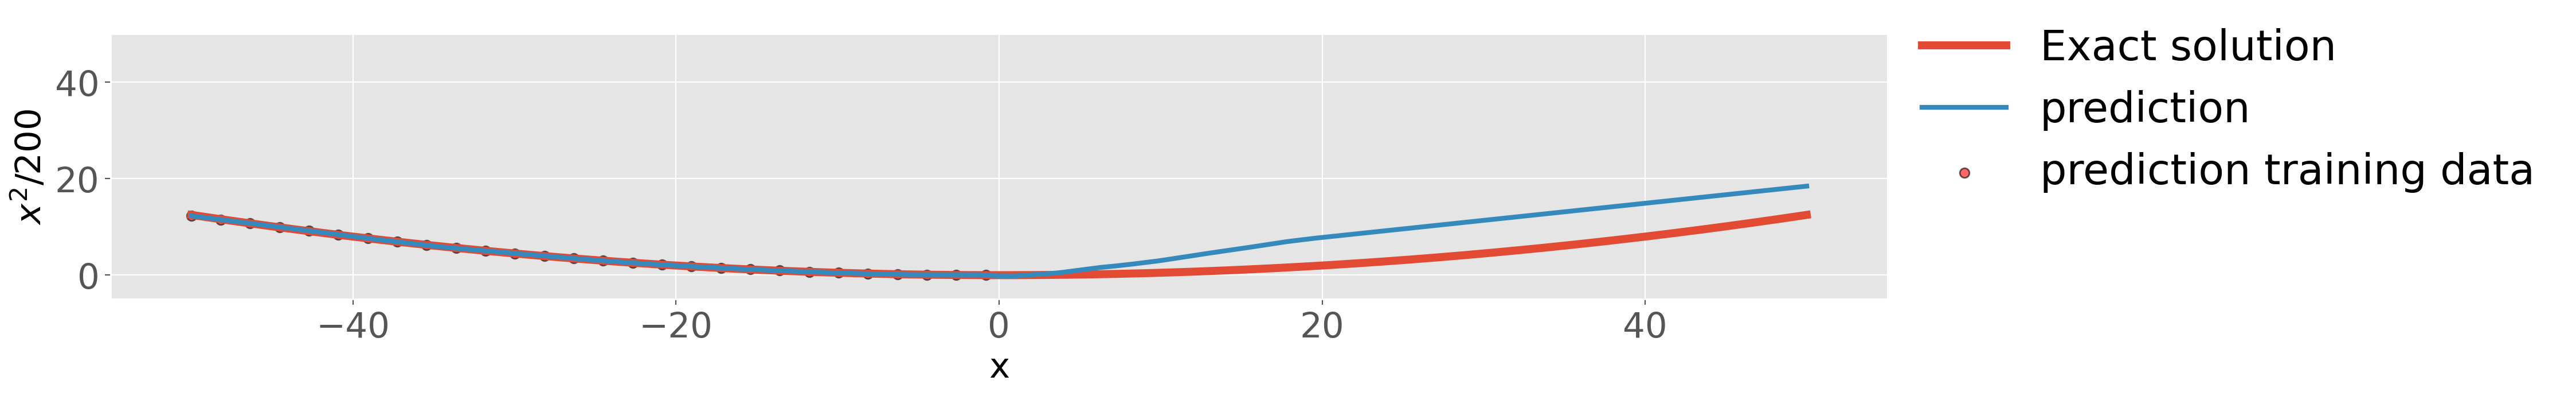

In [46]:
plt.figure()
x_data = x[0:275:10]
y_data = y[0:275:10]

plt.plot(x, x**2/200, lw=5, label="Exact solution")
plt.plot(x, model2d(x.unsqueeze(1)).detach().numpy(), lw=3, label="prediction")
plt.scatter(x_data, model2d(x_data.unsqueeze(1)).detach().numpy(), alpha=0.6, 
                color='#FF0000', lw=1, ec='black', label="prediction training data ")


plt.ylim([-5, 50])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01, 0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")

#plt.title("LHS Sliced (0:150:5) [model2d]")
plt.show()




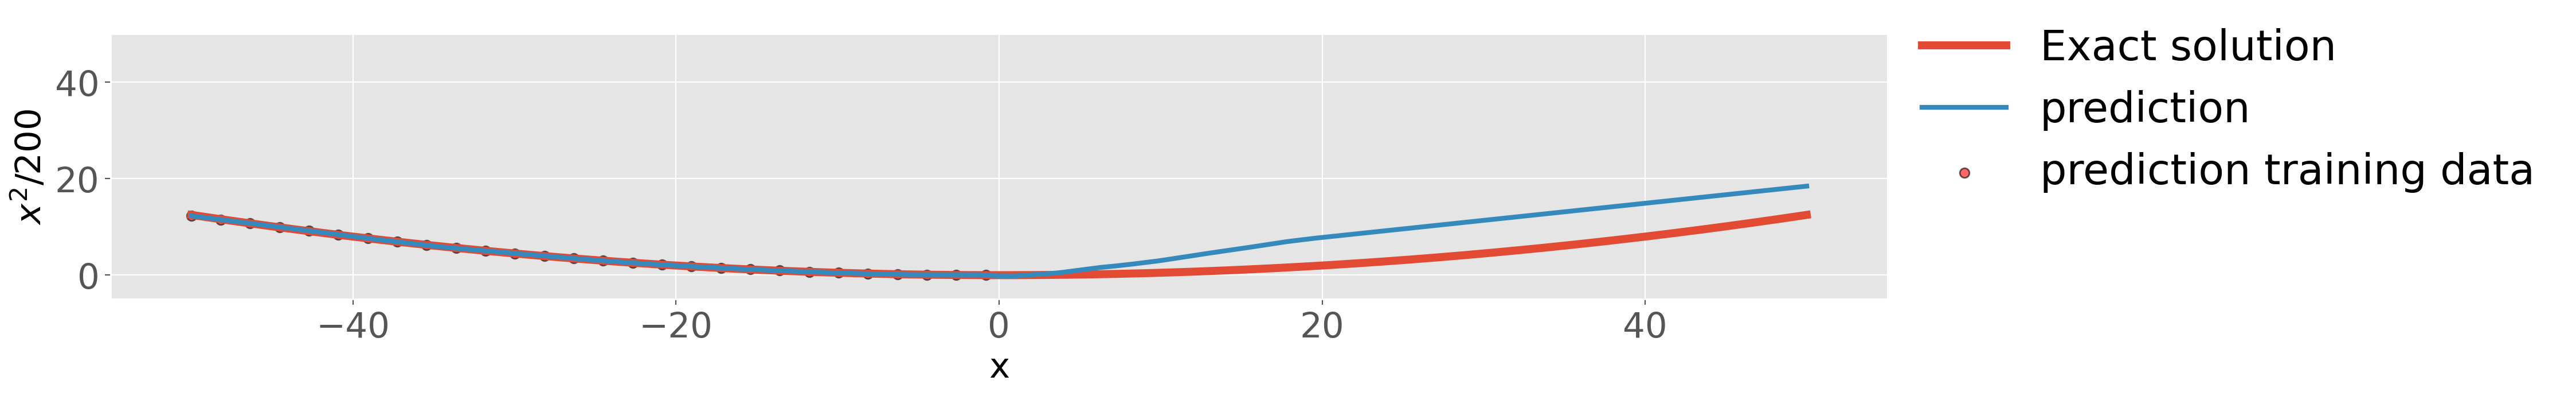

In [47]:


plt.figure()
x_data = x[0:275:10]
y_data = y[0:275:10]

plt.plot(x, x**2/200, lw=5, label="Exact solution")
plt.plot(x, model2d(x.unsqueeze(1)).detach().numpy(), lw=3, label="prediction")
plt.scatter(x_data, model2d(x_data.unsqueeze(1)).detach().numpy(), alpha=0.6, 
                color='#FF0000', lw=1, ec='black', label="prediction training data ")


plt.ylim([-5, 50])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01, 0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")

#plt.title("LHS Sliced (0:150:5) [model2d]")
plt.show()